#### Will use database loan_data.csv

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("./copy_loan_data.csv")
df.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,open_acc,grade,borrower_score,outcome
0,2500,30000,1.00,2.39320,1687,9.4,3,4.8,0.65,default
1,5600,40000,5.55,4.57170,5210,32.6,11,1.4,0.80,default
2,5375,15000,18.08,9.71600,9279,36.5,2,6.0,0.60,default
3,9000,30000,10.08,12.21520,10452,91.7,4,4.2,0.50,default
4,10000,100000,7.06,3.90888,11997,55.5,14,5.4,0.55,default


In [10]:
df.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal',
       'revol_util', 'open_acc', 'grade', 'borrower_score', 'outcome'],
      dtype='object')

In [11]:
X = df[['loan_amnt', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal','revol_util', 'open_acc', 'grade', 'borrower_score']]
Y = df['outcome']

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.31728848, -0.67945911, -1.99264452, -1.32247715, -0.65582306,
        -1.83451876, -1.57841004,  0.13583897,  1.17334854],
       [-0.93402566, -0.50164467, -1.3935502 , -0.81157035, -0.4803951 ,
        -0.9222103 ,  0.12496265, -2.16292895,  2.33897628],
       [-0.96184312, -0.94618075,  0.2562634 ,  0.39488266, -0.27777906,
        -0.7688481 , -1.79133162,  0.94716883,  0.78480596],
       [-0.51367288, -0.67945911, -0.79708926,  0.98100076, -0.21936946,
         1.40181686, -1.36548845, -0.26982596,  0.00772081],
       [-0.39003971,  0.56524192, -1.19472988, -0.96701641, -0.14243612,
        -0.02169893,  0.7637274 ,  0.5415039 ,  0.39626339]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [36]:
Ks = 100
mean_array = np.zeros((Ks-1))
std_array = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    mean_array[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_array[n-1] = np.std(y_test == y_hat)/ np.sqrt(y_test.shape[0])

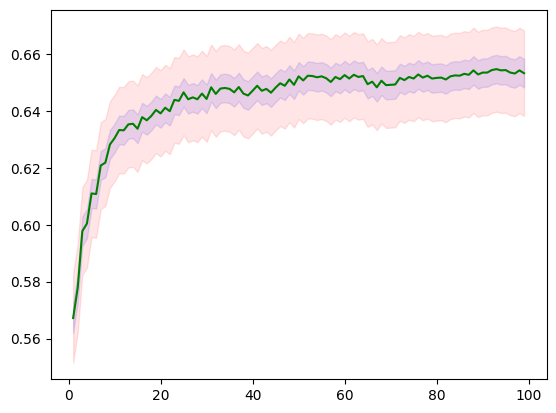

In [23]:
plt.plot(range(1,Ks),mean_array,'g')
plt.fill_between(range(1,Ks),mean_array - 1 * std_array,mean_array + 1 * std_array,alpha=0.1,color='blue')
plt.fill_between(range(1,Ks),mean_array - 3 * std_array,mean_array + 3 * std_array,alpha=0.1,color='red')
plt.show()

In [33]:
print(f"The best accuracy is: {mean_array.max()} The Best K is: {mean_array.argmax() + 1}")

The best accuracy is: 0.6546477009593119 The Best K is: 93


In [34]:
mean_array[20+1]

0.639872091741096

In [57]:
K = 20
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
y_hat_prob = knn.predict_proba(X)

In [50]:
y_hat_prob[:,1].shape

(45342,)

In [45]:
X.shape

(45342, 9)

In [51]:
df['borrower_score2'] = y_hat_prob[:,1]

In [54]:
df[['borrower_score','borrower_score2']].describe()

,borrower_score,borrower_score2
count,45342.000000,45342.000000
mean,0.499006,0.507398
std,0.128687,0.203939
min,0.050000,0.000000
25%,0.400000,0.350000
50%,0.500000,0.500000
75%,0.600000,0.650000
max,1.000000,1.000000


In [55]:
y_hat_prob

array([[0.3 , 0.7 ],
       [0.4 , 0.6 ],
       [0.2 , 0.8 ],
       ...,
       [0.65, 0.35],
       [0.45, 0.55],
       [0.8 , 0.2 ]])

In [ ]:
KNeighborsClassifier.predict_proba()